## Integration of larval datasets from Raj 2020 with adult using Seurat CCA

Use datasets from 2 dpf onwards.  
This analysis is run in parallel with a Harmony integration of the same datasets in another script, as an internal check.

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Load previously merged progenitor dataset

In [2]:
progenitors <- readRDS(file = "/local/Nina/jupyterlab/larvae_adult_int/prog_2dpf-adult_in.rds")

### Integrate with CCA

In [3]:
prog_int.list <- SplitObject(progenitors, split.by = "stage")
#str(prog_int.list)

In [4]:
rm(progenitors)

In [5]:
prog_int.list <- lapply(X = prog_int.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 3000)
})

In [6]:
features <- SelectIntegrationFeatures(object.list = prog_int.list, nfeatures = 3000)

In [7]:
prog.anchors <- FindIntegrationAnchors(object.list = prog_int.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4918 anchors

Filtering anchors

	Retained 3075 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5411 anchors

Filtering anchors

	Retained 2868 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6070 anchors

Filtering anchors

	Retained 3727 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6057 anchors

Filtering anchors

	Retained 2965 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6779 anchors

Filtering anchors

	Retained 3639 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8358 anchors

Filtering anchors

	Retained 5665 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6986 anchors

Filtering anchors

	Retained 2313 an

In [ ]:
str(prog.anchors)

In [8]:
prog.combined <- IntegrateData(anchorset = prog.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 1 into 4 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 4 3 2 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 6 into 4 3 2 1 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [9]:
# specify that we will perform downstream analysis on the corrected data note that the
# original unmodified data still resides in the 'RNA' assay
DefaultAssay(prog.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
prog.combined <- ScaleData(prog.combined, verbose = FALSE)
prog.combined <- RunPCA(prog.combined, npcs = 30, verbose = FALSE)
prog.combined <- RunUMAP(prog.combined, reduction = "pca", dims = 1:30)
prog.combined <- FindNeighbors(prog.combined, reduction = "pca", dims = 1:30)
prog.combined <- FindClusters(prog.combined, resolution = 1.0)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:50:30 UMAP embedding parameters a = 0.9922 b = 1.112

13:50:30 Read 36448 rows and found 30 numeric columns

13:50:30 Using Annoy for neighbor search, n_neighbors = 30

13:50:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:50:36 Writing NN index file to temp file /tmp/RtmpyKQ0ta/file1ad44c4b1f53

13:50:36 Searching Annoy index using 1 thread, search_k = 3000

13:50:50 Annoy recall = 100%

13:50:51 Commencing smooth kNN distance calibration using 1 thread

13:50:54 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36448
Number of edges: 1386081

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8832
Number of communities: 31
Elapsed time: 7 seconds


In [230]:
Idents(prog.combined) <- "stage"

In [12]:
# use Set2 as palette for stage
stage_colors <-  c("adult" = "#66c2a5",
                  "larvae_15dpf" = "#fc8d62",
                  "larvae_2dpf" = "#8da0cb",
                  "larvae_3dpf" = "#e78ac3",
                  "larvae_5dpf" = "#a6d854", 
                  "larvae_8dpf" = "#ffd92f")

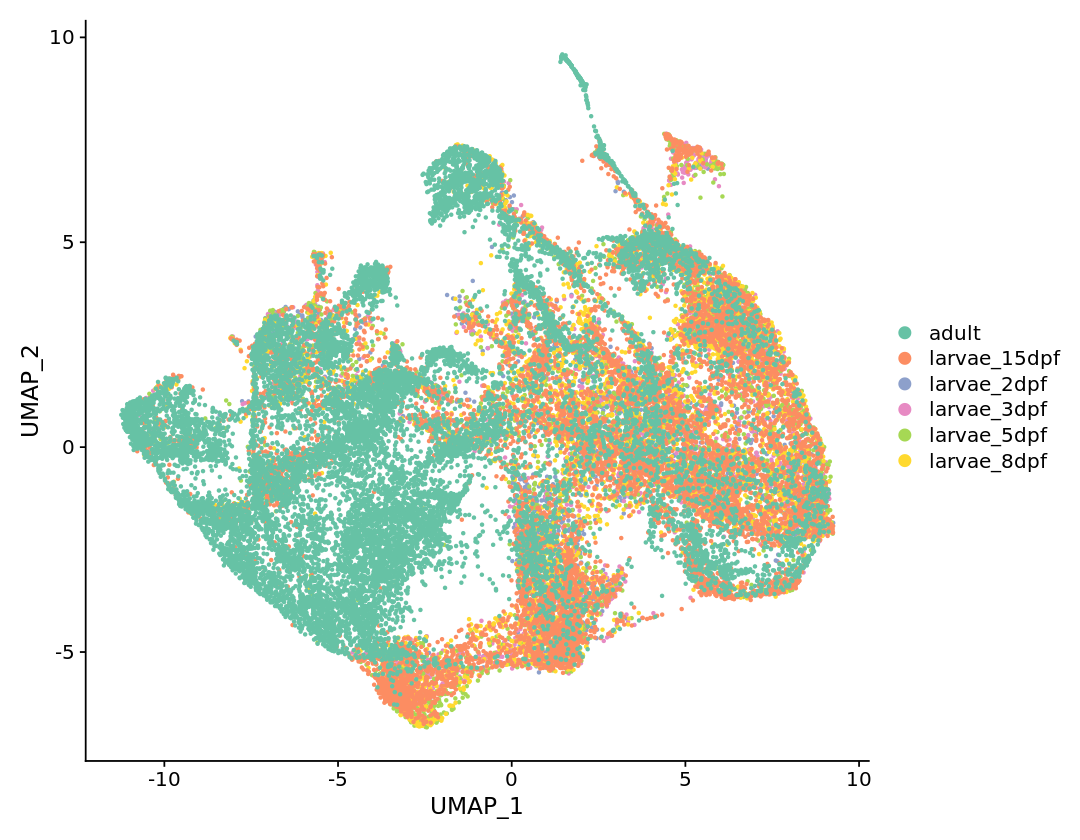

In [234]:
options(repr.plot.width=9, repr.plot.height=7)

int_umap <- DimPlot(prog.combined, reduction = "umap", label = FALSE, cols = stage_colors, pt.size = 0.6)
int_umap

In [235]:
ggsave(filename = "/local/Nina/jupyterlab/larvae_adult_int/figs_seu_lar/umap_int_stages.pdf", 
    plot = int_umap, 
   units = "in", height = 6, width = 7)

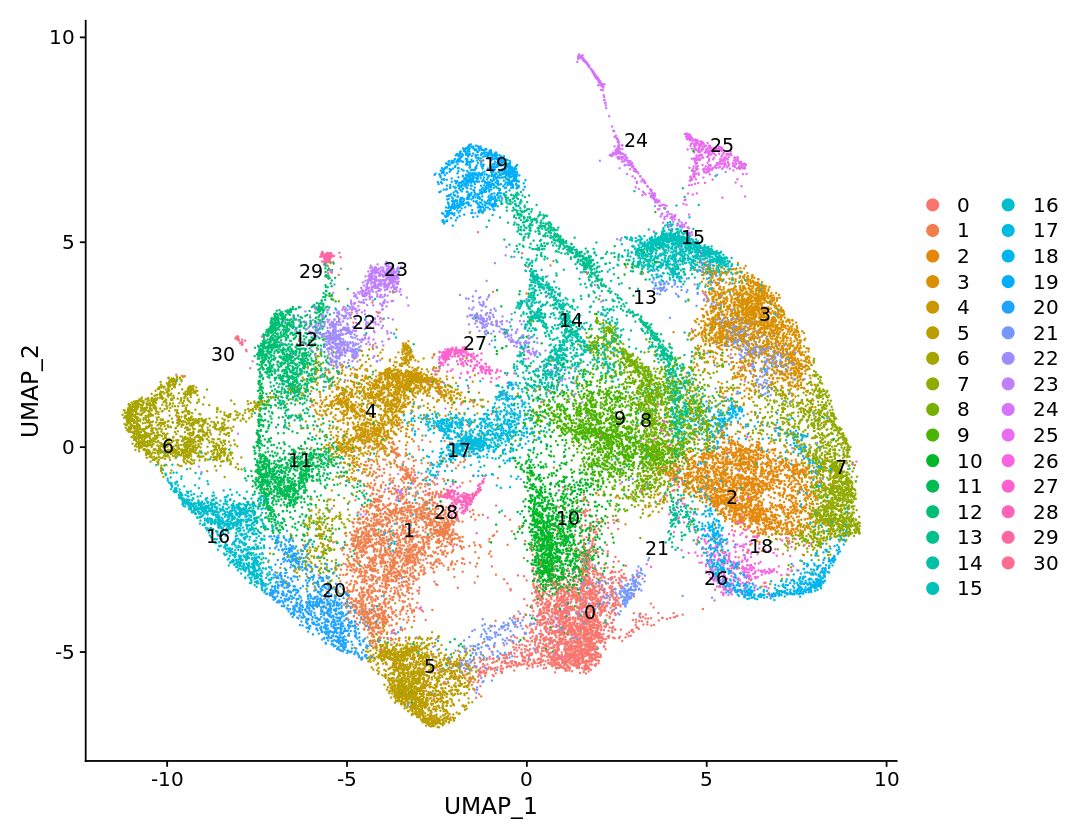

In [37]:
options(repr.plot.width=9, repr.plot.height=7)

DimPlot(prog.combined, reduction = "umap", label = TRUE, repel = TRUE)

In [236]:
Idents(prog.combined) <- "pc28_res0.8_named_detailed"

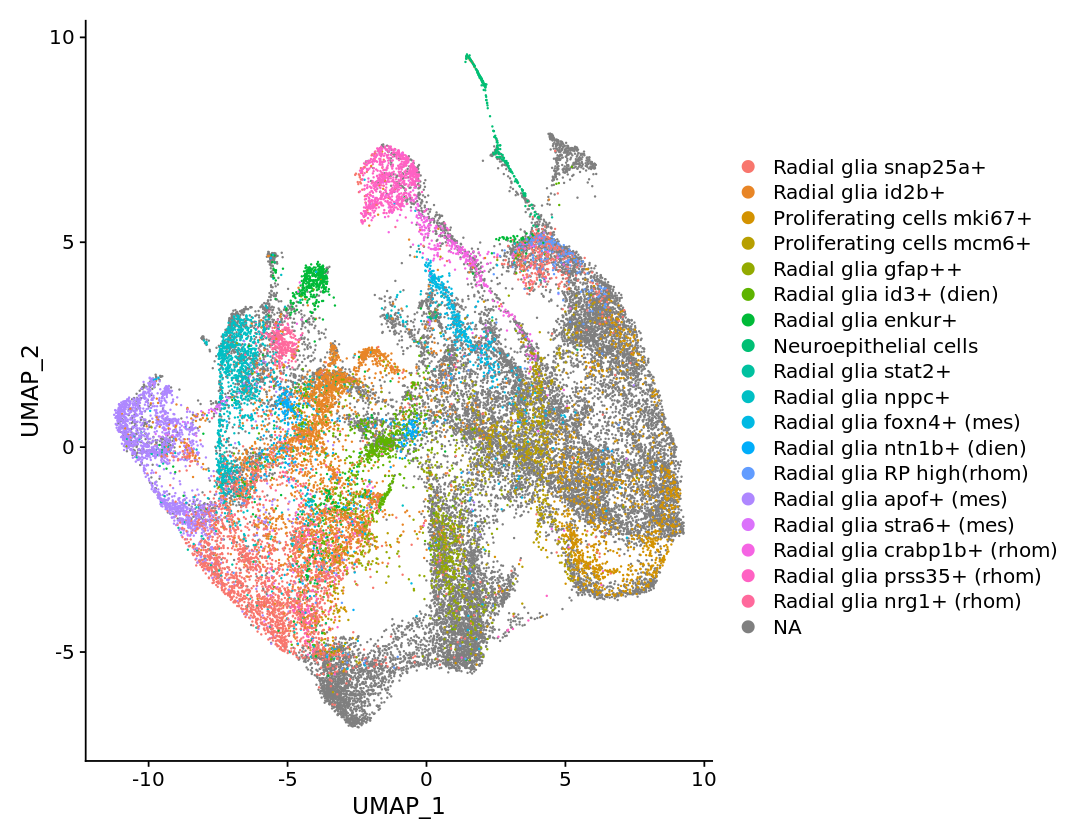

In [239]:
options(repr.plot.width=9, repr.plot.height=7)

int_ct_ad <- DimPlot(prog.combined, reduction = "umap")
int_ct_ad

In [240]:
ggsave(filename = "/local/Nina/jupyterlab/larvae_adult_int/figs_seu_lar/umap_int_adult_celltypes.pdf", 
    plot = int_ct_ad, 
   units = "in", height = 6, width = 8)

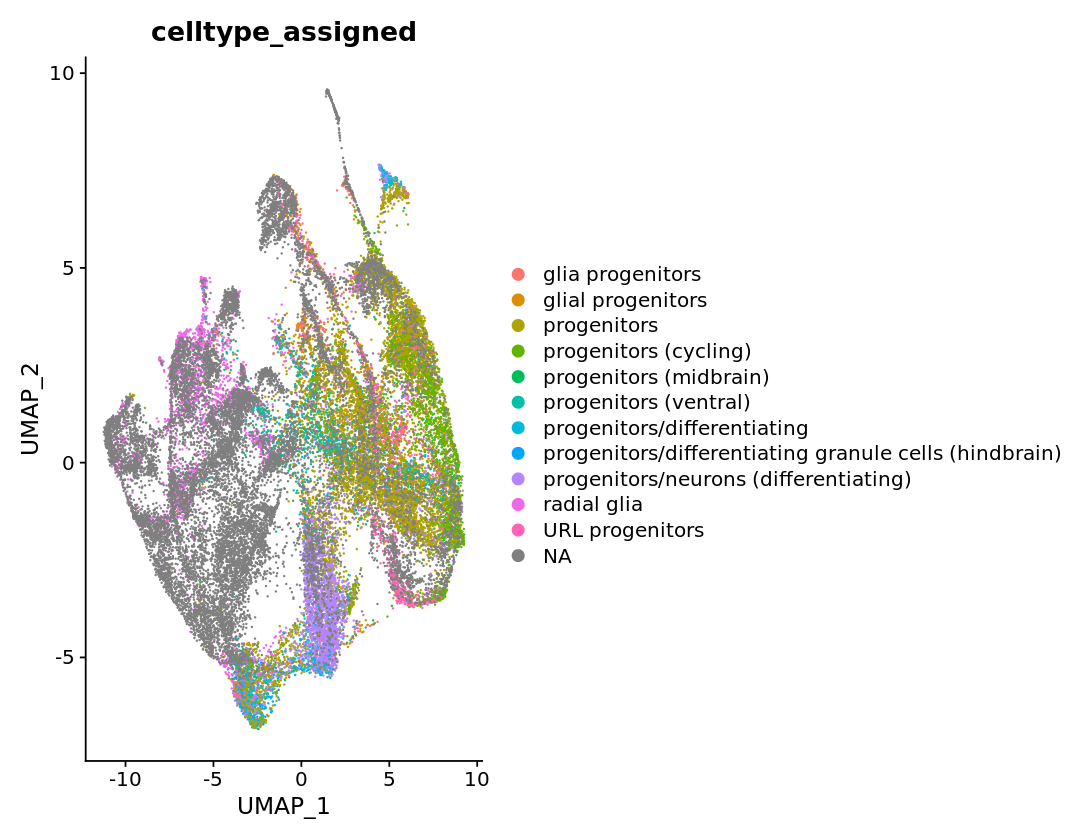

In [39]:
options(repr.plot.width=9, repr.plot.height=7)

DimPlot(prog.combined, reduction = "umap", group.by = "celltype_assigned")

In [14]:
saveRDS(prog.combined, 
        file = "/local/Nina/jupyterlab/larvae_adult_int/int_prog_2dpf-ad_3000vf.rds")

In [2]:
prog.combined <- readRDS(file = "/local/Nina/jupyterlab/larvae_adult_int/int_prog_2dpf-ad_3000vf.rds")

In [3]:
dim(prog.combined)

[1]  3000 36448